Paper 1: https://arxiv.org/pdf/1512.02325.pdf
Citation (SSD): Wei Liu, Dragomir Anguelov, Dumitru Erhan, Christian Szegedy, Scott Reed, Cheng-Yang Fu, Alexander C. Berg. SSD: Single Shot MultiBox Detector. In Proceedings of the 2016 European Conference on Computer Vision (ECCV '16)

**Papers Summary**


**Paper – SSD: Single Shot MultiBox Detector**

 What is the Problem Being Solved? The paper addresses several critical challenges in object detection: Speed-Accuracy Trade-off in Object Detection: Existing methods were either too slow for real-time applications (like Faster R-CNN) or sacrificed accuracy for speed (like YOLO). There was a need for a method that could achieve both high accuracy and real-time performance. Complexity of Traditional Approaches: Multi-stage detectors(like faster R-CNN) used complex pipelines involving region proposal generation, pixel/feature resampling, and multiple processing stages. This complexity made them slow and difficult to implement in real-world systems.

What Method is Proposed? The paper introduces a novel single-stage detection framework with several key innovations: Single Shot Detection: Uses a single deep neural network to directly predict object categories and Bounding box locations. Eliminates the need for separate region proposal and resampling stages. Multi-scale Feature Maps: Adds convolutional layers to create feature maps of different sizes Each feature map is responsible for detecting objects at different scales Enables effective detection of both small and large objects Default Boxes and Predictions: Uses pre-defined "default boxes" with different scales and aspect ratios. Makes predictions at each feature map location for category scores and Bounding box offsets. End-to-End Training: Single unified training framework Combines localization and confidence loss Uses hard negative mining and extensive data augmentation.

What are the Main Claims? The paper makes several significant claims about SSD's performance: Speed and Accuracy Balance: SSD300 (300×300 input) achieves 74.3% mAP on VOC2007 test at 59 FPS. SSD512 (512×512 input) achieves 76.8% mAP on VOC2007 test, and Outperforms Faster R-CNN. Breakthrough Performance: First real-time detector to exceed 70% mAP accuracy 3× faster than comparable accuracy detectors Simplified Architecture: Eliminates need for region proposal generation Provides unified framework for training and inference Easier to integrate into larger systems.

Why is this Interesting? SSD is interesting for several reasons: It solves a fundamental challenge in computer vision by achieving both speed and accuracy. Enables new applications in autonomous vehicles, robotics, and surveillance. Simpler architecture makes it easier to deploy in real-world systems for real-time object detection. Introduces novel concepts like multi-scale feature maps for detection. Demonstrates the potential of single-stage detectors. Provides a practical solution for resource-constrained devices

Object Detection models saw rapid improvement after the development of recurrent neural networks. Although few-shot detection where small batches of data were suplied to allow the model to make a prediction were applied, object detection still lacked accuracy for labels whenever models were presented a single instance of a label class in an image.

Single Shot detection uses multiple bounding boxes to identify objects in images that match the embeddings learned through a trained model. Given these priors the Single Shot Detection model yields impressive accuracy for correctly labelling known categories of objects for new images


Running Code: Loading the data You will need to replicate this directory structure to have the training and test data on hand to evaluate the Single Shot Detection Model:

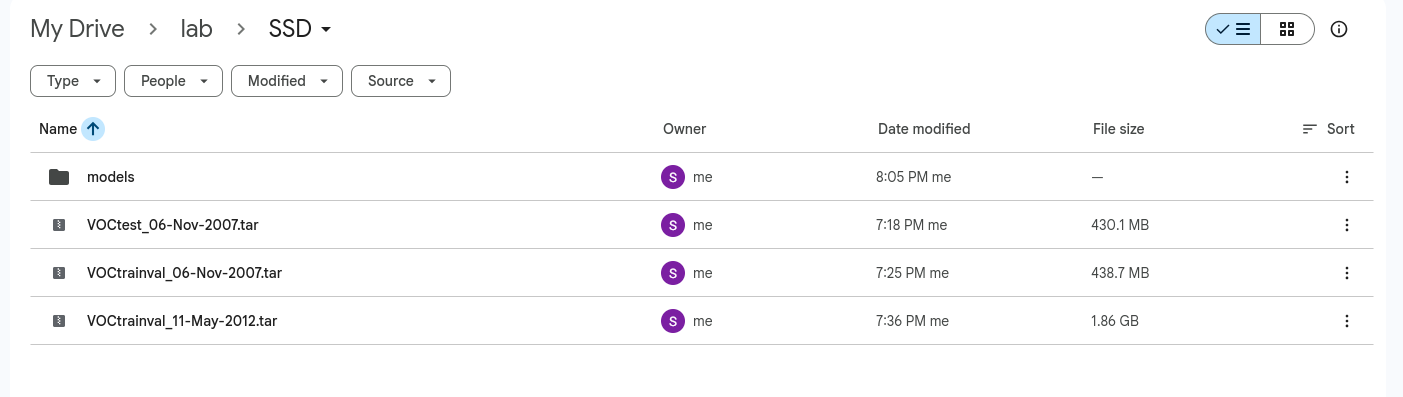

In [ ]:
# Note: training datasets are 2Gb and 1/2 Gb, please download them to your own GooglDrive here:
linky = "https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection#download"

In [ ]:
# you need to replicate this dir layout in your personal google drive if you want to pload the model

from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/lab/SSD/"
gdrive_dir = "/content/gdrive/My Drive/lab/SSD/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
models	       VOCtest_06-Nov-2007.tar	    VOCtrainval_11-May-2012.tar
sample_photos  VOCtrainval_06-Nov-2007.tar


In [ ]:
# Optional: download pre-trained models from Box repository,
# If gdown does not work, please manually download them here:
model_folder_link = 'https://nyu.box.com/s/6i9rqlxyuvpfyazfaeyd5hnqs38g3dib'

#models
ssd_lite_url = 'https://nyu.box.com/s/nvbxr4kug3rgprv6z4zgz036u0ar2grx'
ssd_efficient_url = 'https://nyu.box.com/s/jbs8f765k28nsd7xrv1cn087fhah1jp9'
ssd_mobile_net = 'https://nyu.box.com/s/tn1q2j8rakzi5rse80s8f11mnfkewhh8'

!gdown ssd_lite_url
!gdown ssd_efficient_url
!gdown ssd_mobile_net

In [ ]:
# this is to manually copy over pytorch model fiells from a user's google drive repo to the runtime.
# if the model cannot train or evaluate in subsequent cells, please check to see if your model
# files are in the destinations listed.

!mkdir models
!cp /content/gdrive/MyDrive/lab/SSD/models/checkpoint_ssd_lite.pt /content/models/
!cp /content/gdrive/MyDrive/lab/SSD/models/ssd_efficientnet_b3.pt /content/models/
!cp /content/gdrive/MyDrive/lab/SSD/models/ssd_mobilenetv2.pt   /content/models/

mkdir: cannot create directory ‘models’: File exists


In [ ]:
# Note: due to pytorch pkg and google colab limitations: this notebook and  WORKs WITH NUMPY 1.26.0
# What you need to do: run cell, if cell prints out numpy version is 2.02, restart session
# with the same runtime type, then run cell again.
%pip uninstall numpy
%pip install --upgrade numpy==1.26.0
import numpy
print(numpy.__version__)

In [ ]:
# run is gdown has issues with file download permissions:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
#Other repo links:
# don't use these their repo struct is different
# voc2007_train = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
# voc2007_test = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar'
# voc2012_train = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar'

#NYU box links:
voc_train_2012 = 'https://nyu.box.com/s/sv5tkasn1aza07hsvgyufdnw3eaukiyb'
voc_train_2007 = 'https://nyu.box.com/s/k2pkoejh1xt4e4zd5fhjad6wdfrmodlr'
voc_test_2007  = 'https://nyu.box.com/s/vffu5deb314xrqspzu553bchk2i1ocxa'

#piping is aspirational
#!gdown voc2012_train -O - --quiet | tar xvf -

!gdown $voc_train_2007
!gdown $voc_test_2007
!gdown $voc_train_2012

Downloading...
From: https://nyu.box.com/s/k2pkoejh1xt4e4zd5fhjad6wdfrmodlr
To: /content/k2pkoejh1xt4e4zd5fhjad6wdfrmodlr
21.4kB [00:00, 147kB/s]
Downloading...
From: https://nyu.box.com/s/vffu5deb314xrqspzu553bchk2i1ocxa
To: /content/vffu5deb314xrqspzu553bchk2i1ocxa
21.4kB [00:00, 141kB/s]
Downloading...
From: https://nyu.box.com/s/sv5tkasn1aza07hsvgyufdnw3eaukiyb
To: /content/sv5tkasn1aza07hsvgyufdnw3eaukiyb
21.4kB [00:00, 141kB/s]


In [ ]:
#^ If the above !gdown commands fail, you will need to manually download the datasets from box.
# the recommended (practically necessary) way is the UPLOAD THE ENTIRE TAR FILE to your google dirve, then you will extract it in the following cell.
# you may need to change your directory path to unzip these files. note: !tar -XtractVerboseFile /path/to/sourceTar /path/to/outputdir

!tar -xvf "/content/gdrive/My Drive/lab/SSD/VOCtest_06-Nov-2007.tar" --directory /content
!tar -xvf "/content/gdrive/My Drive/lab/SSD/VOCtrainval_06-Nov-2007.tar" --directory /content
!tar -xvf "/content/gdrive/My Drive/lab/SSD/VOCtrainval_11-May-2012.tar" --directory /content

In [ ]:
#!cp /content/gdrive/My\ Drive/lab/SSD/datasets/*.json /content/datasets
!git clone https://github.com/ncthuan/single-shot-detection-pytorch
!cp -r single-shot-detection-pytorch/*.py .
!pip install albumentations==0.4.6 -q

fatal: destination path 'single-shot-detection-pytorch' already exists and is not an empty directory.


In [ ]:
#check working directory is import problems:
!ls /content/single-shot-detection-pytorch/effnet

efficient_net_b3.py  __init__.py  __pycache__  utils.py


In [ ]:
#WORK WITH NUMPY 1.26.0
import sys
sys.path.append('/content/single-shot-detection-pytorch/effnet')
sys.path.append('/content/single-shot-detection-pytorch/')
import os
import time
import torch
import torch.cuda as cuda
import numpy as np
from torch.utils.data import DataLoader
from dataset import VOCDataset, collate_fn
from ssdLite import SSDLite
#from ssdEff import SSDEff
#use absolute import insted:
import effnet
from effnet.efficient_net_b3 import EfficientNet
from loss import MultiBoxLoss
from utils import create_data_lists, clip_gradient, save_checkpoint
from eval_detection_voc import eval_detection_voc
device = torch.device("cuda")
#device = torch.device("cuda") if cuda.is_available() else "cpu")

In [ ]:
!pip install torchtnt
!pip install opencv-python

In [ ]:
import torchtnt.utils.loggers as logger

In [ ]:
# If you have different data folders here, add them to this cell!
from utils import create_data_lists

# voc07_path = os.path.join('path_to_your_data_repo', '/VOC2007_or similar/')
# voc12_path = os.path.join('Vpath_to_your_data_repo', '/VOC2012_or_similar/')

voc07_path = os.path.join('VOCdevkit/', 'VOC2007/')
voc12_path = os.path.join('VOCdevkit/', 'VOC2012/')
create_data_lists(voc07_path, voc12_path, output_folder='VOCdevkit/')


There are 17202 training images. Files have been saved to output_folder: VOCdevkit/.

There are 4301 validation images. Files have been saved to output_folder: VOCdevkit/.


In [ ]:
# Doule check your data repository!
!ls /content/
print("\n")
!ls VOCdevkit/
print("\n")
!ls VOCdevkit/VOC2007/
print("\n")
!ls VOCdevkit/VOC2012/

aug.py				  single-shot-detection-pytorch
dataset.py			  ssd300.py
eval_detection_voc.py		  ssdEff.py
gdrive				  ssdLite.py
k2pkoejh1xt4e4zd5fhjad6wdfrmodlr  sv5tkasn1aza07hsvgyufdnw3eaukiyb
loss.py				  test.py
model.py			  utils.py
models				  vffu5deb314xrqspzu553bchk2i1ocxa
__pycache__			  VOCdevkit
sample_data


label_map.json	   TRAIN_objects.json  VAL_objects.json  VOC2012
TRAIN_images.json  VAL_images.json     VOC2007


Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


In [ ]:
# most likely you will only have the gpu memory for the smallest dataloaders structure
torch.manual_seed(42)
trainset = VOCDataset(data_folder='VOCdevkit/', json_files=('TRAIN_images.json', 'TRAIN_objects.json'), augment=True, img_size=320)
valset = VOCDataset(data_folder='VOCdevkit/', json_files=('VAL_images.json', 'VAL_objects.json'), img_size=320)

dataloaders = dict(
    train = DataLoader(trainset, batch_size=32, collate_fn=collate_fn, shuffle=True, num_workers=2),
    val = DataLoader(valset, batch_size=32, collate_fn=collate_fn, shuffle=False, num_workers=2),
)

dataloaders_med = dict(
    train = DataLoader(trainset, batch_size=48, collate_fn=collate_fn, shuffle=True, num_workers=2),
    val = DataLoader(valset, batch_size=48, collate_fn=collate_fn, shuffle=False, num_workers=2),
)

dataloaders_lrg = dict(
    train = DataLoader(trainset, batch_size=64, collate_fn=collate_fn, shuffle=True, num_workers=2),
    val = DataLoader(valset, batch_size=64, collate_fn=collate_fn, shuffle=False, num_workers=2),
)

In [ ]:
# Here are the object classes we are classifying
import json
with open('/content/VOCdevkit/label_map.json', 'r') as file:
    label_map = json.load(file)
label_map

{'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20,
 'background': 0}

In [ ]:
# before running the model: create functions for saving training data to csv for analysis
import logging
from torchtnt.utils.loggers import CSVLogger

_logger: logging.Logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

gdrive_dir_models =gdrive_dir + 'models/'
csv_logger = CSVLogger(path = gdrive_dir_models, steps_before_flushing= 100, log_all_ranks= True, async_write= False)

In [ ]:
# logging object : csv_logger
# use as: csv_logger.log(name, data, step)

def train_epoch(model, trainset_loader, loss_func, optimizer, epoch_id):
    '''
    set model mode to train, runs for 1 epoch before returning loss
    '''
    model.train()
    train_loss = 0
    for step, (imgs, boxes, labels) in enumerate(trainset_loader):
        # move input data to GPU
        imgs = imgs.to(device)
        boxes = [b.to(device) for b in boxes]
        labels = [l.to(device) for l in labels]

        # forward
        predicted_offsets, predicted_scores = model(imgs)
        loss = loss_func(predicted_offsets, predicted_scores, boxes, labels)

        # backward & optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch_id == 1 and step % 50 == 0:
            # print(f'Epoch 1 - step {step}: train_loss: {loss.item():.4f}')
            csv_logger.log("Epoch", epoch_id, step)
            csv_logger.log("Train_loss", loss.item(), step)
        elif epoch_id > 1 and step % 50 == 0:
            # print(f'Epoch {epoch_id} step {step}: train_loss: {loss.item():.4f}')
            csv_logger.log("Epoch", epoch_id, step)
            csv_logger.log("Train_loss", loss.item(), step)
        train_loss += loss.item()
    return round(train_loss/len(trainset_loader), 4)

def eval_epoch(model, valset_loader, loss_func, epoch_id):
    '''
    set model mode to eval evaluates 1 epoch before returning evaluated loss
    '''
    model.eval()
    val_loss = 0
    try:
      with torch.no_grad():
          for step, (imgs, boxes, labels) in enumerate(valset_loader):
              imgs = imgs.to(device)
              boxes = [b.to(device) for b in boxes]
              labels = [l.to(device) for l in labels]

              predicted_offsets, predicted_scores = model(imgs)
              loss = loss_func(predicted_offsets, predicted_scores, boxes, labels)
              val_loss += loss.item()
              if step % 50 == 0:

                csv_logger.log("Epoch", epoch_id, step)
                csv_logger.log("Train_loss", loss.item(), step)
    except:
        print("couldn't eval")
    finally:
      print("eval finished")
    return round(val_loss/len(valset_loader), 4)

def train_model(model, dataloaders, optimizer, loss_func, n_epoch=1, checkpoint=0):
    if checkpoint:
      try:
        last_epoch = checkpoint['epoch']
        print("model checkpoint epoch is ", last_epoch)
      except:
        print("couldn't access epoch")
        last_epoch = 1
      # if checkpoint['epoch']:
      #   last_epoch = checkpoint['epoch']
      #   print("model checkpoint epoch is ", last_epoch)
      # else:
      #   print("couldn't access epoch")

    #train
    train_loss_hist, val_loss_hist = [], []
    for epoch_id in range(last_epoch+1, last_epoch+n_epoch+1):
        print("current model's working epoch is ", epoch_id)
        start_time = time.time()
        train_loss = train_epoch(model, dataloaders['train'], loss_func, optimizer, epoch_id)
        training_time = round(time.time() - start_time)
        # remeber to save this to local!!!
        save_checkpoint(epoch_id, model, optimizer, checkpoint_path)

        # eval val_loss every epoch
        start_time = time.time()
        val_loss = eval_epoch(model, dataloaders['val'], loss_func, epoch_id)
        val_time = round(time.time() - start_time)

        train_loss_hist.append(train_loss)
        val_loss_hist.append(val_loss)

        print(f'Epoch {epoch_id} - train/val_time: {training_time}s | {val_time}s - train_loss: {train_loss} - val_loss: {val_loss}')

    return train_loss_hist, val_loss_hist

In [ ]:
# or, upload your own model file!
# move this code cell

from google.colab import files
files.download(checkpoint_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#this is the minimum stel of command you need to load a new pytorch model
#checkpoint_ssd_lite_05
checkpoint_5path = 'checkpoint_ssd_lite_05.pt'
checkpoint_5 = torch.load((google_drive_path + checkpoint_5path),  weights_only=False)
ssd_lite_05 = checkpoint_5['model']
optimizer_05 = checkpoint_5['optimizer']
current_epoch_05 = checkpoint_5['epoch']

grad_clip = None
loss_func = MultiBoxLoss(priors_cxcy=ssd_lite.get_prior_boxes(), threshold=0.5, neg_pos_ratio=3, alpha=1.)
exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98, last_epoch=-1)

In [ ]:
from warnings import catch_warnings

#only use if needed:
# device = cuda.get_current_device()
# device.reset()

# change this to whatever dir you want your model to go into in google drive!
google_drive_path = '/content/gdrive/MyDrive/lab/SSD/models/'

#checkpoint = torch.load(checkpoint_path)
try:
  checkpoint_path = 'models/checkpoint_ssd_lite.pt'
  # mobilenetV2_path ='models/ssd_mobilenetv2.pt'
  # checkpoint_5path = 'models/checkpoint_ssd_lite_05.pt'
  try:
    checkpoint = torch.load(checkpoint_path,  weights_only=False)
    checkpoint_5 = torch.load(checkpoint_5path,  weights_only=False)
    #checkpoint_mobilenetV2 = torch.load(mobilenetV2_path,  weights_only=False)
  except:
    # If Google Colab limits your runtime to CPU  only:
    checkpoint = torch.load(checkpoint_path, weights_only=False, map_location=torch.device('cpu'))
  finally:
    ssd_lite = checkpoint['model']
    optimizer = checkpoint['optimizer']
    current_epoch = checkpoint['epoch']
    # ssd_lite_05 = checkpoint_5['model']
    # optimizer_05 = checkpoint_5['optimizer']
    # current_epoch_05 = checkpoint_5['epoch']
    # state_dict = ssd_lite.load_state_dict(checkpoint['modelA_state_dict'])
except:
  print('loading new external model, if you see this it did not detect and passed model checkpoint')
  ssd_lite = SSDLite(n_classes=21).to(device)
  optimizer = torch.optim.Adam(ssd_lite.parameters(), lr=1e-3, weight_decay=5e-4)
finally:
  if checkpoint_path or checkpoint_5path:
    # swaps over the path to automatically overwrite and save the ssd_lite model to google drive repo
    checkpoint_path = google_drive_path + 'checkpoint_ssd_lite.pt'
  grad_clip = None

loss_func = MultiBoxLoss(priors_cxcy=ssd_lite.get_prior_boxes(), threshold=0.5, neg_pos_ratio=3, alpha=1.)
exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98, last_epoch=-1)

Now training the SSD model!

In [ ]:
print(checkpoint_path)

/content/gdrive/MyDrive/lab/SSD/models/checkpoint_ssd_lite.pt


In [ ]:
# MODEL TRAINING
print(current_epoch)
train_hist, val_hist = train_model(ssd_lite, dataloaders_med, optimizer, loss_func, n_epoch=5, checkpoint=checkpoint)

In [ ]:
train_hist, val_hist = train_model(ssd_lite_05, dataloaders_med, optimizer, loss_func, n_epoch=10, checkpoint=checkpoint_5)

In [ ]:
# #MODEL TRAINING
# print(current_epoch)
loss_func = MultiBoxLoss(priors_cxcy=ssd_lite.get_prior_boxes(), threshold=0.5, neg_pos_ratio=3, alpha=1.)

# train_hist, val_hist = train_model(ssd_lite, dataloaders_med, optimizer, loss_func, n_epoch=3, checkpoint=checkpoint_5)
train_hist, val_hist = train_model(ssd_lite_05, dataloaders_med, optimizer, loss_func, n_epoch=3, checkpoint=checkpoint_5)

model checkpoint epoch is  1
current model's working epoch is  2
eval finished
Epoch 2 - train/val_time: 356s | 44s - train_loss: 3.6739 - val_loss: 3.5916
current model's working epoch is  3
eval finished
Epoch 3 - train/val_time: 355s | 42s - train_loss: 3.6803 - val_loss: 3.5859
current model's working epoch is  4
eval finished
Epoch 4 - train/val_time: 357s | 42s - train_loss: 3.6842 - val_loss: 3.5945


In [ ]:
# ALTERNATIVE EXAMPLE INVOLVING A DIFFEREN SSD MODEL, THE SSD WITH THE EFFICIENTNET BACKBONE:

# if you want to, you can upload other ssd-model-type files:
from google.colab import files
uploaded = files.upload()

In [ ]:
# ALTERNATIVE EXAMPLE INVOLVING A DIFFEREN SSD MODEL, THE SSD WITH THE EFFICIENTNET BACKBONE:

# if upload "ssd_efficientnet_b3.pt" (this is accessible via the box links):

checkpoint_path_eff = '/content/ssd_efficientnet_b3.pt'
checkpoint_eff= torch.load(checkpoint_path_eff, weights_only = False) # None

ssd_eff = checkpoint_eff['model']
ssd_eff.to('cuda')
optimizer = checkpoint_eff['optimizer']
    exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.96, last_epoch=checkpoint['epoch']-1)
else:
    ssd_eff = SSDEff(n_classes=21).to(device)
    optimizer = torch.optim.Adam(ssd_eff.parameters(), lr=2e-3, weight_decay=5e-4)
    #exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.96)

loss_func_eff = MultiBoxLoss(priors_cxcy=ssd_eff.get_prior_boxes(), threshold=0.5, alpha=1., neg_pos_ratio=3, focal_loss=False)

grad_clip = None

In [ ]:
# ALTERNATIVE EXAMPLE INVOLVING A DIFFEREN SSD MODEL, THE SSD WITH THE EFFICIENTNET BACKBONE:

ssd_eff = checkpoint_eff['model'].to(device)

ssd_eff.requires_grad_(False)
ssd_eff.lat_fm10.requires_grad_(True)
ssd_eff.lat_fm19.requires_grad_(True)
ssd_eff.final_fm19.requires_grad_(True)
ssd_eff.final_fm38.requires_grad_(True)
ssd_eff.det_fm38.requires_grad_(True)
ssd_eff.det_fm19.requires_grad_(True)
ssd_eff.det_fm10.requires_grad_(True)
ssd_eff.det_fm5.requires_grad_(True)
ssd_eff.det_fm3.requires_grad_(True)

In [ ]:
# ALTERNATIVE EXAMPLE INVOLVING A DIFFEREN SSD MODEL, THE SSD WITH THE EFFICIENTNET BACKBONE:

# evaluation of other trained model throuws an eror presumably becuase the puictures are of a different dimensions
# this fixes that

trainset_ssdeff = VOCDataset(data_folder='VOCdevkit/', json_files=('TRAIN_images.json', 'TRAIN_objects.json'), augment=True, img_size=300)
valset_ssdeff = VOCDataset(data_folder='VOCdevkit/', json_files=('VAL_images.json', 'VAL_objects.json'), img_size=300)

dataloaders_eff = dict(
    train = DataLoader(trainset_ssdeff, batch_size=16, collate_fn=collate_fn, shuffle=True, num_workers=2),
    val = DataLoader(valset_ssdeff, batch_size=16, collate_fn=collate_fn, shuffle=False, num_workers=2),
)

In [ ]:
# ALTERNATIVE EXAMPLE INVOLVING A DIFFEREN SSD MODEL, THE SSD WITH THE EFFICIENTNET BACKBONE:

train_hist, val_hist = train_model(ssd_eff, dataloaders_eff, optimizer, loss_func_eff, n_epoch=1, checkpoint=checkpoint_eff)

APs, mAP = eval_APs_mAP(ssd_eff.to(device), dataloaders_eff['val'])

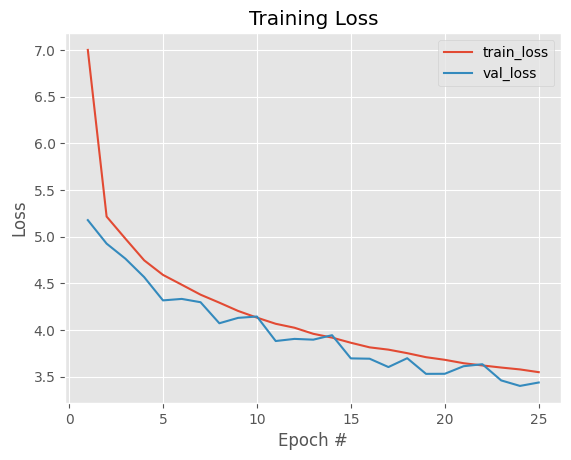

In [ ]:
#Plot training loss over time:
import pandas as pd
log_file_path = 'single-shot-detection-pytorch/results/hist/hist_ssdlite.csv'
hist = pd.read_csv(log_file_path, nrows=25) #csv log file, made upon epoch finish
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(hist['epoch'], hist["train_loss"], label="train_loss")
plt.plot(hist['epoch'], hist["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def eval_APs_mAP(model, valset_loader):
    '''
    '''
    model.eval()
    detected_boxes = list()
    detected_labels = list()
    detected_scores = list()
    true_boxes = list()
    true_labels = list()
    #true_diffs = list()
    #device = next(model.parameters()).device
    #print("model is on device ", device)

    with torch.no_grad():
        for step, (imgs, boxes, labels) in enumerate(valset_loader):
            #print(" return map method is  on image number ", step)
            # move input data to GPU
            imgs = imgs.to(device)
            boxes = [b.to(device) for b in boxes]
            labels = [l.to(device) for l in labels]
            #diffs = [d.to(device) for d in diffs]
            print()

            # detect objects
            predicted_offsets, predicted_scores = model(imgs)
            # for i in range(len(predicted_offsets)):
            #     # predicted_offsets[i] = predicted_offsets[i].to(device)
            #     # predicted_scores[i] = predicted_scores[i].to(device)
            #     print("predicted_offsets are ", predicted_offsets[i])
            #     print("predicted scores are", predicted_scores[i])
            #     print("\n")
            batch_det_boxes, batch_det_labels, batch_det_scores = model.post_process_top_k(predicted_offsets.to(device), predicted_scores.to(device),
                                                                                      score_threshold=0.02, iou_threshold=0.45, top_k=200)
            detected_boxes.extend(batch_det_boxes)
            detected_labels.extend(batch_det_labels)
            detected_scores.extend(batch_det_scores)
            true_boxes.extend(boxes)
            true_labels.extend(labels)
            #true_diffs.extend(diffs)

        # calculate metrics value
        detected_boxes_np = [i.cpu().numpy() for i in detected_boxes]
        detected_labels_np = [i.cpu().numpy() for i in detected_labels]
        detected_scores_np = [i.cpu().numpy() for i in detected_scores]
        true_boxes_np = [i.cpu().numpy() for i in true_boxes]
        true_labels_np = [i.cpu().numpy() for i in true_labels]
        result = eval_detection_voc(detected_boxes_np, detected_labels_np, detected_scores_np, true_boxes_np, true_labels_np)

    return result['ap'], result['map']

In [ ]:
#MODEL EVALUATION
# where AP is the average precision for a class,
# mAP is the mean of average precision across classes
APs, mAP = eval_APs_mAP(ssd_lite, dataloaders['val'])

In [ ]:
# shortly - trained model class AP's, and MAP for SSD Modle with MobileNetV2 Backbone

print(APs)
print(mAP)

[       nan 0.60142677 0.42000522 0.24265939 0.255925   0.07495096
 0.55187024 0.52183509 0.62103953 0.28706034 0.22203451 0.39654325
 0.45426697 0.44523118 0.5707572  0.56203276 0.18188902 0.3218545
 0.40120489 0.52499896 0.38696827]
0.4022277024423996


In [ ]:
class_AP_short_training = [       0, 0.60142677, 0.42000522, 0.24265939, 0.255925,   0.07495096,
 0.55187024, 0.52183509, 0.62103953, 0.28706034, 0.22203451, 0.39654325,
 0.45426697, 0.44523118, 0.5707572,  0.56203276, 0.18188902, 0.3218545,
 0.40120489, 0.52499896, 0.38696827]

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import cv2
from aug import SSDInputTransform

# loading some example images from the training data:
image_lst = ["002079.jpg",
"002078.jpg",
"002065.jpg",
"002040.jpg",
"002031.jpg",
"002035.jpg",
"002080.jpg",
"002077.jpg",
"001983.jpg",
"002029.jpg",
"002013.jpg",
"001991.jpg",
"001959.jpg",
"001986.jpg"]
image_folder = gdrive_dir+'sample_photos/'
detected_images = []
for file in os.listdir(image_folder):
    filename = os.fsdecode(file)
    print(filename)
    if filename.endswith(".jpg"):
      if (filename in image_lst):
        img = cv2.imread(image_folder + filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        detected_images.append(detect_single_img(ssd_lite, img, score_threshold=.25, iou_threshold=.25, top_k=100, input_size= 320))
    else:
        continue

Model output examples:


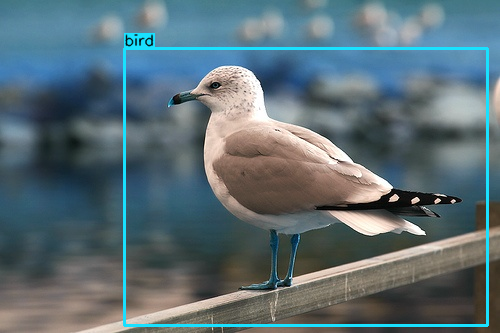

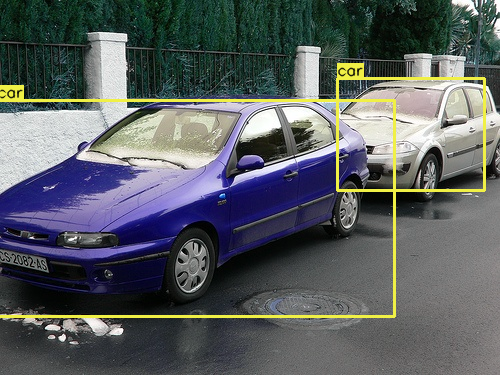

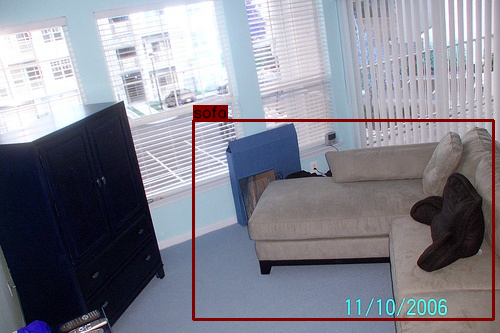

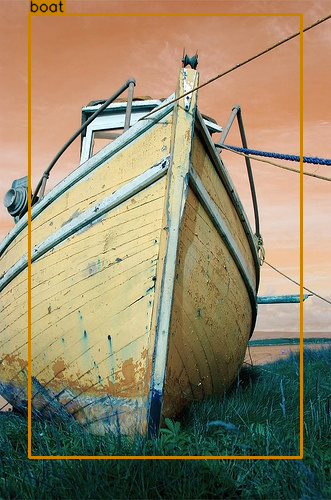

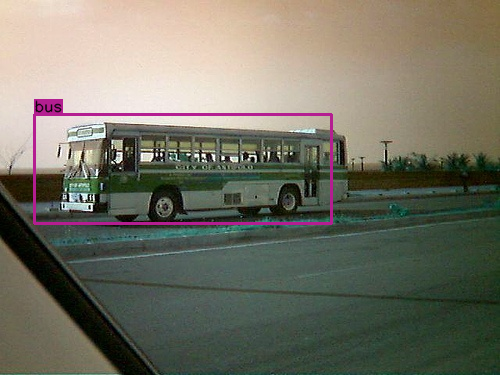

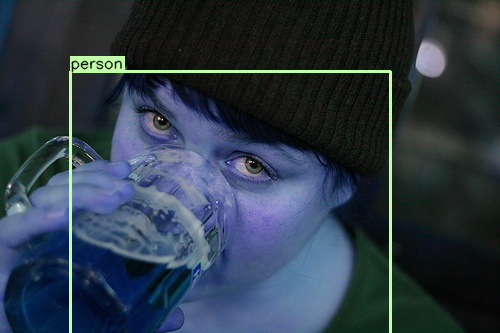

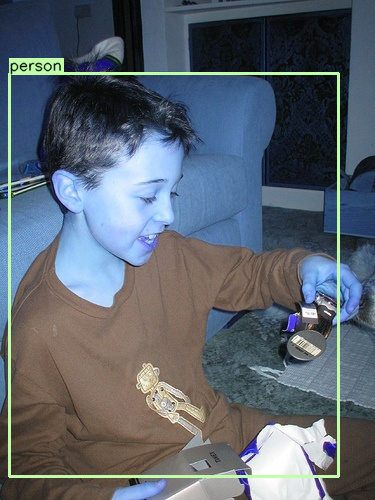

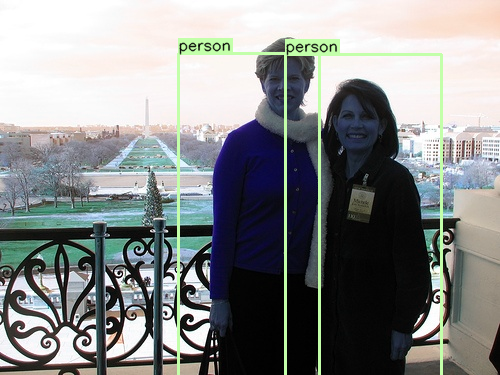

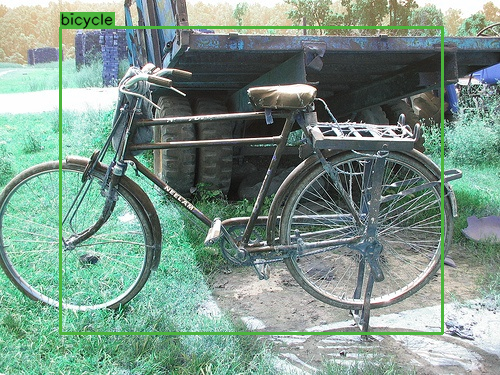

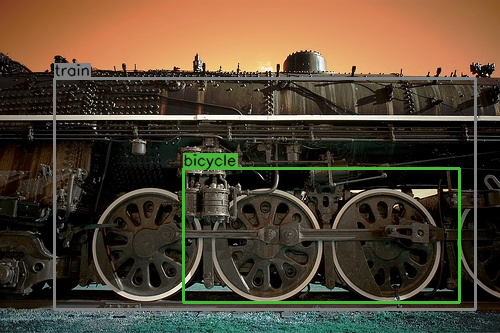

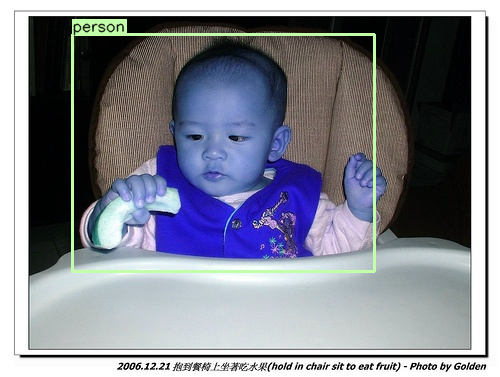

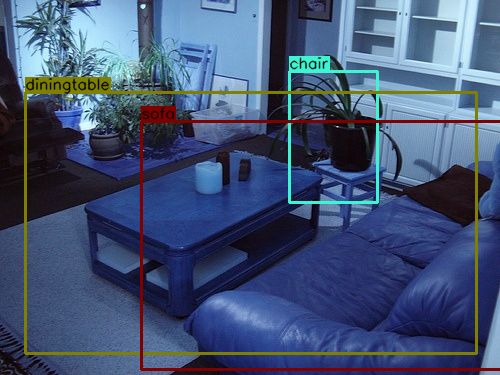

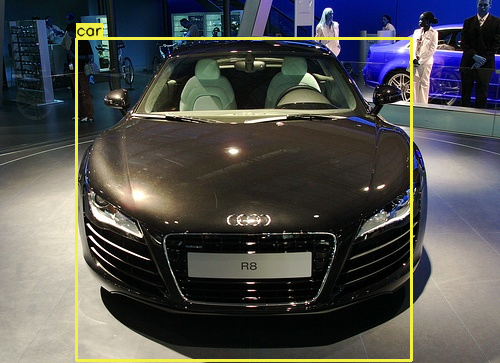

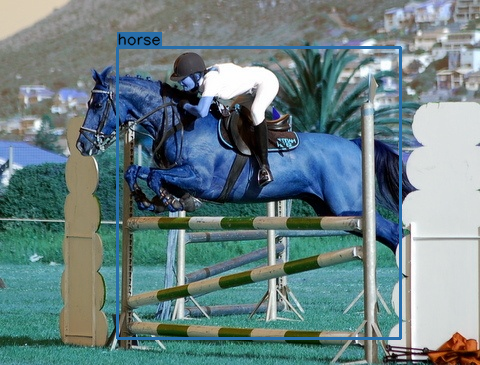

In [ ]:
from google.colab.patches import cv2_imshow
for image in detected_images:
  cv2_imshow(image)

In [ ]:
# CODE THAT GENERATE OUTPUT IMAGES:
import sys
sys.path.append('/content/single-shot-detection-pytorch/ut')
from utils import visualize_boxes, rescale_original_coordinates

def detect_single_img(model, img, score_threshold, iou_threshold, top_k, input_size):
    input_transform = SSDInputTransform(size=input_size)
    '''
    img: a single image in numpy.ndarray format, (h, w, c)
    other args: see model.py's post processing functions for more information
    return: an image with bounding boxes of detected objects drawn on it
    '''
    model.eval()
    # input transform:
    # -> SSDInputTransform -> transpose to channel first -> to tensor -> unsqueeze to (1,3,300,300) -> to device
    img_data, padding = input_transform(img.copy())
    img_data = torch.from_numpy(img_data.transpose((2,0,1))).unsqueeze(0).to(device) #(1,3,300,300)

    # inference
    predicted_offsets, predicted_scores = model(img_data)
    boxes, labels, scores = model.post_process_top_k(predicted_offsets, predicted_scores,
                                                     score_threshold, iou_threshold, top_k)
    assert (len(boxes) == 1) and (len(labels) == 1) #since batch of size 1 so the output should be a list with 1 element

    # output refinement
    boxes = boxes[0]
    labels = labels[0]
    if boxes.size(0) <= 0:
        return img
    h, w = img.shape[0:2]
    if h > w:
        boxes = rescale_original_coordinates(boxes, h, h)
        boxes[:,0] -= padding
        boxes[:,2] -= padding
    else:
        boxes = rescale_original_coordinates(boxes, h, w)
    boxes = boxes.tolist()
    labels = labels.tolist()

    #should print out images
    return visualize_boxes(img, boxes, labels)

**My Learning Log:**



Some technical concepts I learned to implement while implementing this paper:


1. **Bounding box**: Bounding boxes are rectangular regions that define the location and size of detected objects in images. In the SSD framework, there are two critical types: Default Boxes and Predicted Boxes.

Importance in SSD:  Unlike two-stage detectors, SSD uses default boxes to directly predict object locations. It also enables simultaneous prediction of object location and class in a single pass.

2. **Feature Maps**:
Feature maps are intermediate outputs produced by different layers of the neural network. They represent spatial arrangements of detected features at various levels of abstraction: Lower layers(higher resolution, capture fine details) and higher layers(lower resolution, capture more abstract features).

Importance in SSD:  Enables detection of objects at various scales without additional computation. It helps capture both fine details and high-level patterns, and allows parallel processing of different scales in a single forward pass.
3. **Single Deep Neural Network:**
A  single deep neural network is a specific kind of neural network where single indicates that it consists of just one model, not an ensemble or combination of multiple networks. And deep indicates that it has multiple hidden layers (typically more than 2). The depth gives it power to model complex relationships and hierarchical features.

Importance in SSD: It eliminates complex multi-stage pipelines used in other detectors. It helps in achieving real-time performance (59 FPS for SSD300) through unified processing, and reduces computational overhead by avoiding multiple processing stages.